<a href="https://colab.research.google.com/github/Venchislav/Neural-Networks/blob/main/FashionMNIST_KERAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [412]:
import pandas as pd
import numpy as np

In [413]:
df = pd.read_csv('/content/sample_data/fashion-mnist_train.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [414]:
df.isnull().sum().sum()

0

In [415]:
df.shape

(60000, 785)

In [416]:
df = df.dropna()

In [417]:
df.shape

(60000, 785)

In [418]:
from sklearn.utils import shuffle

In [419]:
X = df.drop('label', axis=1)
y = df['label']

In [420]:
X = np.array(X)
y = np.array(y)

In [421]:
X, y = shuffle(X, y)

In [422]:
X = X / 255

In [423]:
import matplotlib.pyplot as plt
import seaborn as sns

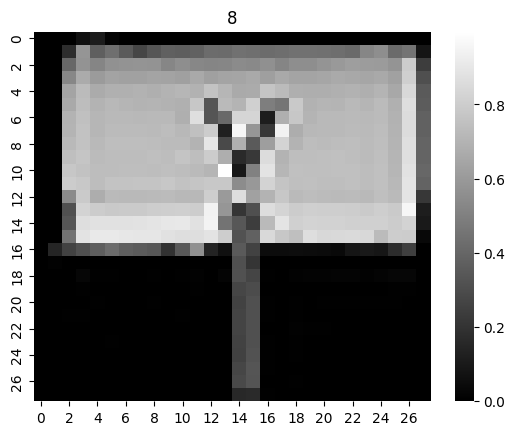

In [424]:
sns.heatmap(X[0].reshape(28,28), cmap='gray')
plt.title(y[0]);

In [425]:
len(set(y))

10

In [426]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In [427]:
model = Sequential([
    layers.Dense(units=50, activation='relu', input_shape=(784,)),
    layers.Dense(units=25, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])

In [428]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [429]:
hist = model.fit(
    X, y,
    batch_size=128,
    epochs=20,
    validation_split=0.1,
    shuffle=True,
    verbose=2
)

Epoch 1/20
422/422 - 3s - loss: 0.6755 - accuracy: 0.7643 - val_loss: 0.4599 - val_accuracy: 0.8418 - 3s/epoch - 7ms/step
Epoch 2/20
422/422 - 1s - loss: 0.4387 - accuracy: 0.8457 - val_loss: 0.4055 - val_accuracy: 0.8563 - 1s/epoch - 3ms/step
Epoch 3/20
422/422 - 1s - loss: 0.3957 - accuracy: 0.8591 - val_loss: 0.4159 - val_accuracy: 0.8493 - 1s/epoch - 3ms/step
Epoch 4/20
422/422 - 2s - loss: 0.3742 - accuracy: 0.8658 - val_loss: 0.3667 - val_accuracy: 0.8718 - 2s/epoch - 4ms/step
Epoch 5/20
422/422 - 2s - loss: 0.3569 - accuracy: 0.8714 - val_loss: 0.3459 - val_accuracy: 0.8757 - 2s/epoch - 4ms/step
Epoch 6/20
422/422 - 1s - loss: 0.3393 - accuracy: 0.8778 - val_loss: 0.3605 - val_accuracy: 0.8680 - 1s/epoch - 3ms/step
Epoch 7/20
422/422 - 1s - loss: 0.3302 - accuracy: 0.8800 - val_loss: 0.3399 - val_accuracy: 0.8775 - 1s/epoch - 3ms/step
Epoch 8/20
422/422 - 1s - loss: 0.3184 - accuracy: 0.8842 - val_loss: 0.3279 - val_accuracy: 0.8810 - 1s/epoch - 3ms/step
Epoch 9/20
422/422 - 1s 

In [430]:
history_df = pd.DataFrame(hist.history)
history_df

,loss,accuracy,val_loss,val_accuracy
0,0.675541,0.764315,0.459895,0.841833
1,0.438744,0.845667,0.405488,0.856333
2,0.395735,0.859111,0.415890,0.849333
3,0.374233,0.865833,0.366651,0.871833
4,0.356941,0.871352,0.345934,0.875667
5,0.339271,0.877815,0.360515,0.868000
6,0.330195,0.880037,0.339897,0.877500
7,0.318395,0.884185,0.327946,0.881000
8,0.309059,0.886741,0.331417,0.881167
9,0.300909,0.890000,0.322277,0.881167


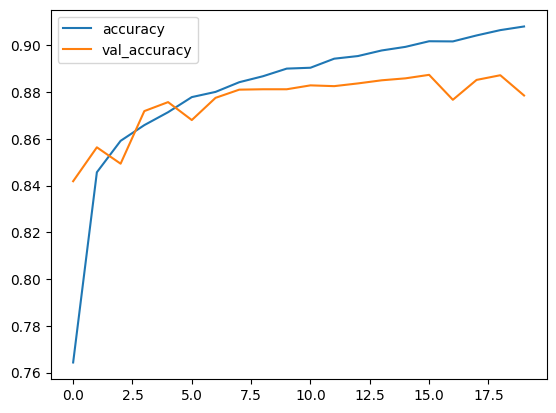

In [431]:
history_df.loc[:, ['accuracy', 'val_accuracy']].plot();

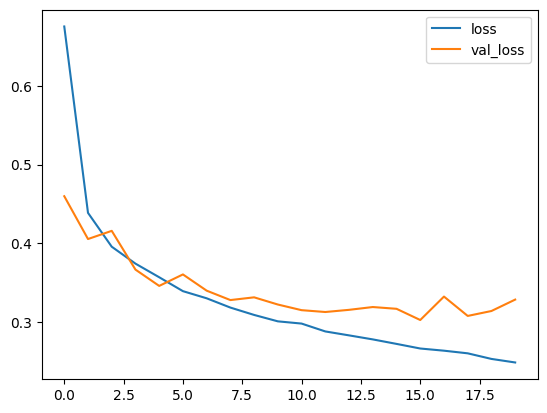

In [432]:
history_df.loc[:, ['loss', 'val_loss']].plot();